In [41]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
import numpy as np

In [42]:
s=","
r=Reader(s)   #initialising the object of Reader Class

In [43]:
path=["Desktop/train (1).csv","Desktop/test (1).csv"]
target_name="Survived"
data=r.train_test_split(path,target_name)


reading csv : train (1).csv ...
cleaning data ...
CPU time: 0.4376845359802246 seconds

reading csv : test (1).csv ...
cleaning data ...
CPU time: 0.42467594146728516 seconds

> Number of common features : 11

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 5
> Number of numerical features: 6
> Number of training samples : 891
> Number of test samples : 418

> Top sparse features (% missing values on train set):
Cabin       77.1
Age         19.9
Embarked     0.2
dtype: float64

> Task : classification
0.0    549
1.0    342
Name: Survived, dtype: int64

encoding target ...


In [44]:
dft=Drift_thresholder()
data=dft.fit_transform(data)


computing drifts ...
CPU time: 0.3723115921020508 seconds

> Top 10 drifts

('PassengerId', 1.0)
('Name', 0.99185208230523303)
('Ticket', 0.68610638128091361)
('Cabin', 0.1649747120495717)
('Embarked', 0.07188149631764329)
('Fare', 0.034290480067251217)
('SibSp', 0.030969343709039254)
('Parch', 0.027738672133688524)
('Pclass', 0.026295514754860472)
('Sex', 0.014844577766323752)

> Deleted variables : ['Name', 'PassengerId', 'Ticket']
> Drift coefficients dumped into directory : save


In [47]:
space = {

        'ne__numerical_strategy' : {"space" : [0, 'mean']},

        'ce__strategy' : {"space" : ["label_encoding", "random_projection", "entity_embedding"]},

        'fs__strategy' : {"space" : ["variance", "rf_feature_importance"]},
        'fs__threshold': {"search" : "choice", "space" : [0.1, 0.2, 0.3]},

        'est__strategy' : {"space" : ["XGBoost"]},
        'est__max_depth' : {"search" : "choice", "space" : [5,6]},
        'est__subsample' : {"search" : "uniform", "space" : [0.6,0.9]}

        }

best = opt.optimise(space, data, max_evals = 5)




##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'categorical_strategy': '<NULL>', 'numerical_strategy': 'mean'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.2}

>>> ESTIMATOR :{'reg_lambda': 1, 'objective': 'binary:logistic', 'n_estimators': 500, 'colsample_bytree': 0.8, 'nthread': -1, 'max_delta_step': 0, 'strategy': 'XGBoost', 'seed': 0, 'missing': None, 'learning_rate': 0.05, 'base_score': 0.5, 'reg_alpha': 0, 'colsample_bylevel': 1.0, 'subsample': 0.7994841852997239, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0, 'scale_pos_weight': 1, 'silent': True}


MEAN SCORE : accuracy = 0.698113190819
VARIANCE : 0.0243544307977 (fold 1 = 0.720670391061, fold 2 = 0.664804469274, fold 3 = 0.674157303371, fold 4 = 0.724719101124, fold 5 = 0.706214689266)
CPU time: 2.529618978500366 seconds


##########################


fitting the pipeline ...
CPU time: 3.5851974487304688 seconds


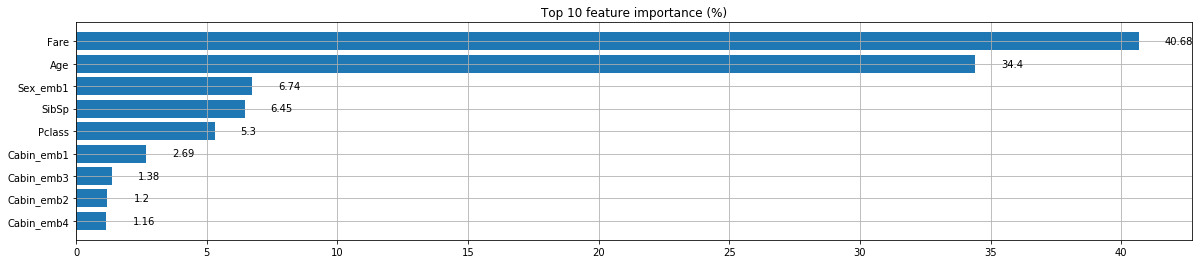


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.05717110633850098 seconds

> Overview on predictions : 

        0.0       1.0  Survived_predicted
0  0.960412  0.039588                   0
1  0.947843  0.052157                   0
2  0.689267  0.310733                   0
3  0.502915  0.497085                   0
4  0.689871  0.310129                   0
5  0.923558  0.076442                   0
6  0.877651  0.122349                   0
7  0.981097  0.018903                   0
8  0.071094  0.928906                   1
9  0.976368  0.023632                   0

dumping predictions into directory : save ...


In [48]:
from mlbox.prediction import *
pred=Predictor()
pred.fit_predict(best,data)


In [55]:
submit = pd.read_csv("Desktop/gender_submission (1).csv",sep=',')
preds = pd.read_csv("save/"+target_name+"_predictions.csv")

submit[target_name] =  preds[target_name+"_predicted"].values

submit.to_csv("mlbox.csv", index=False)